In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import requests

In [2]:
df = pd.read_csv("daily-shelter-overnight-service-occupancy-capacity-2023.csv")
df

,_id,OCCUPANCY_DATE,ORGANIZATION_ID,ORGANIZATION_NAME,SHELTER_ID,SHELTER_GROUP,LOCATION_ID,LOCATION_NAME,LOCATION_ADDRESS,LOCATION_POSTAL_CODE,...,OCCUPIED_BEDS,UNOCCUPIED_BEDS,UNAVAILABLE_BEDS,CAPACITY_ACTUAL_ROOM,CAPACITY_FUNDING_ROOM,OCCUPIED_ROOMS,UNOCCUPIED_ROOMS,UNAVAILABLE_ROOMS,OCCUPANCY_RATE_BEDS,OCCUPANCY_RATE_ROOMS
0,1,2023-01-01T00:00:00,24,COSTI Immigrant Services,40,COSTI Reception Centre,1320,COSTI Hotel Program Dixon,640 Dixon Rd.,M9W 1J1,...,NaN,NaN,NaN,148.0,150.0,148.0,0.0,2.0,NaN,100.0
1,2,2023-01-01T00:00:00,24,COSTI Immigrant Services,40,COSTI Reception Centre,1320,COSTI Hotel Program Dixon,640 Dixon Rd.,M9W 1J1,...,NaN,NaN,NaN,56.0,56.0,56.0,0.0,0.0,NaN,100.0
2,3,2023-01-01T00:00:00,24,COSTI Immigrant Services,40,COSTI Reception Centre,1051,COSTI Reception Centre,100 Lippincott St,M5S 2P1,...,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,100.00,NaN
3,4,2023-01-01T00:00:00,24,COSTI Immigrant Services,40,COSTI Reception Centre,1114,COSTI Uptown Hotel Program,55 Hallcrown Pl,M2J 4R1,...,NaN,NaN,NaN,76.0,83.0,76.0,0.0,7.0,NaN,100.0
4,5,2023-01-01T00:00:00,24,COSTI Immigrant Services,40,COSTI Reception Centre,1114,COSTI Uptown Hotel Program,55 Hallcrown Pl,M2J 4R1,...,NaN,NaN,NaN,148.0,148.0,148.0,0.0,0.0,NaN,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48340,48341,2023-12-31T00:00:00,17,YWCA Toronto,78,YWCA-348 Davenport,1129,YWCA Davenport Shelter,348 Davenport Road,M5R 1K6,...,27.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,100.00,NaN
48341,48342,2023-12-31T00:00:00,31,Youth Without Shelter,52,Youth Without Shelter,1064,Youth Without Shelter,6 Warrendale Ct,M9V 1P9,...,33.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,100.00,NaN
48342,48343,2023-12-31T00:00:00,31,Youth Without Shelter,52,Youth Without Shelter,1064,Youth Without Shelter,6 Warrendale Ct,M9V 1P9,...,20.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,100.00,NaN
48343,48344,2023-12-31T00:00:00,38,YouthLink,81,YouthLink Shelter,1147,YouthLink,747 Warden Ave,M1L 4A1,...,10.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,100.00,NaN


In [3]:
df.OCCUPANCY_DATE = df.OCCUPANCY_DATE.str.strip("T00:00:00")

In [4]:
df

,_id,OCCUPANCY_DATE,ORGANIZATION_ID,ORGANIZATION_NAME,SHELTER_ID,SHELTER_GROUP,LOCATION_ID,LOCATION_NAME,LOCATION_ADDRESS,LOCATION_POSTAL_CODE,...,OCCUPIED_BEDS,UNOCCUPIED_BEDS,UNAVAILABLE_BEDS,CAPACITY_ACTUAL_ROOM,CAPACITY_FUNDING_ROOM,OCCUPIED_ROOMS,UNOCCUPIED_ROOMS,UNAVAILABLE_ROOMS,OCCUPANCY_RATE_BEDS,OCCUPANCY_RATE_ROOMS
0,1,2023-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1320,COSTI Hotel Program Dixon,640 Dixon Rd.,M9W 1J1,...,NaN,NaN,NaN,148.0,150.0,148.0,0.0,2.0,NaN,100.0
1,2,2023-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1320,COSTI Hotel Program Dixon,640 Dixon Rd.,M9W 1J1,...,NaN,NaN,NaN,56.0,56.0,56.0,0.0,0.0,NaN,100.0
2,3,2023-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1051,COSTI Reception Centre,100 Lippincott St,M5S 2P1,...,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,100.00,NaN
3,4,2023-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1114,COSTI Uptown Hotel Program,55 Hallcrown Pl,M2J 4R1,...,NaN,NaN,NaN,76.0,83.0,76.0,0.0,7.0,NaN,100.0
4,5,2023-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1114,COSTI Uptown Hotel Program,55 Hallcrown Pl,M2J 4R1,...,NaN,NaN,NaN,148.0,148.0,148.0,0.0,0.0,NaN,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48340,48341,2023-12-31,17,YWCA Toronto,78,YWCA-348 Davenport,1129,YWCA Davenport Shelter,348 Davenport Road,M5R 1K6,...,27.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,100.00,NaN
48341,48342,2023-12-31,31,Youth Without Shelter,52,Youth Without Shelter,1064,Youth Without Shelter,6 Warrendale Ct,M9V 1P9,...,33.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,100.00,NaN
48342,48343,2023-12-31,31,Youth Without Shelter,52,Youth Without Shelter,1064,Youth Without Shelter,6 Warrendale Ct,M9V 1P9,...,20.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,100.00,NaN
48343,48344,2023-12-31,38,YouthLink,81,YouthLink Shelter,1147,YouthLink,747 Warden Ave,M1L 4A1,...,10.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,100.00,NaN


In [6]:
df.OCCUPANCY_RATE_ROOMS.isna().value_counts()  ### true NAN 

OCCUPANCY_RATE_ROOMS
True     32888
False    15457
Name: count, dtype: int64

In [7]:
df.OCCUPANCY_RATE_BEDS.isna().value_counts()

OCCUPANCY_RATE_BEDS
False    32888
True     15457
Name: count, dtype: int64

In [8]:
df['OCCUPANCY_RATE_ROOMS'] = np.where(pd.isna(df['OCCUPANCY_RATE_ROOMS']), df['OCCUPANCY_RATE_BEDS'], df['OCCUPANCY_RATE_ROOMS'])


In [9]:
df.OCCUPANCY_RATE_ROOMS.isna().value_counts()

OCCUPANCY_RATE_ROOMS
False    48345
Name: count, dtype: int64

In [10]:
df[["OCCUPANCY_DATE", "LOCATION_NAME","OCCUPANCY_RATE_ROOMS"]]

,OCCUPANCY_DATE,LOCATION_NAME,OCCUPANCY_RATE_ROOMS
0,2023-01-01,COSTI Hotel Program Dixon,100.00
1,2023-01-01,COSTI Hotel Program Dixon,100.00
2,2023-01-01,COSTI Reception Centre,100.00
3,2023-01-01,COSTI Uptown Hotel Program,100.00
4,2023-01-01,COSTI Uptown Hotel Program,100.00
...,...,...,...
48340,2023-12-31,YWCA Davenport Shelter,100.00
48341,2023-12-31,Youth Without Shelter,100.00
48342,2023-12-31,Youth Without Shelter,100.00
48343,2023-12-31,YouthLink,100.00


In [11]:
df_new = df[["OCCUPANCY_DATE", "LOCATION_NAME","OCCUPANCY_RATE_ROOMS"]]
df_new

,OCCUPANCY_DATE,LOCATION_NAME,OCCUPANCY_RATE_ROOMS
0,2023-01-01,COSTI Hotel Program Dixon,100.00
1,2023-01-01,COSTI Hotel Program Dixon,100.00
2,2023-01-01,COSTI Reception Centre,100.00
3,2023-01-01,COSTI Uptown Hotel Program,100.00
4,2023-01-01,COSTI Uptown Hotel Program,100.00
...,...,...,...
48340,2023-12-31,YWCA Davenport Shelter,100.00
48341,2023-12-31,Youth Without Shelter,100.00
48342,2023-12-31,Youth Without Shelter,100.00
48343,2023-12-31,YouthLink,100.00


In [12]:
df_new.LOCATION_NAME.nunique()

112

In [13]:
df_new["LOCATION_NAME"].unique()

array(['COSTI Hotel Program Dixon', 'COSTI Reception Centre',
       'COSTI Uptown Hotel Program', 'CONC Etobicoke Hotel Program',
       'CONC West End Hotel Program', "CONC Men's Shelter Lansdowne Ave",
       "CONC Men's Shelter Bloor St W", 'Christie Refugee Welcome Centre',
       'SSHA Birkdale Residence', 'SSHA North York West Hotel Program',
       'SSHA Downsview Dells', 'SSHA Roehampton Hotel Program',
       "Scarborough Women's Shelter - Milner", 'SSHA Family Residence',
       'SSHA Scarborough Hotel Program 3',
       'SSHA Scarborough Hotel Program 4', 'SSHA Fort York Residence',
       'SSHA North Hotel Program', 'Progress Avenue Shelter',
       'Robertson House', 'SSHA Etobicoke Hotel Program',
       'SSHA Scarborough Hotel Program 1',
       'SSHA Scarborough Village Residence', 'SSHA Junction Place',
       'SSHA Seaton House', 'SSHA Downtown Response Program',
       'Streets to Homes Assessment and Referral Centre (SHARC)',
       'SSHA Downtown Hotel Program', "

In [14]:
df_COSTI_Recep_Cen = df_new.loc[(df_new["LOCATION_NAME"]=="COSTI Reception Centre") & (df_new["OCCUPANCY_DATE"]<= "2023-03-31")]
df_COSTI_Recep_Cen

,OCCUPANCY_DATE,LOCATION_NAME,OCCUPANCY_RATE_ROOMS
2,2023-01-01,COSTI Reception Centre,100.0
138,2023-01-02,COSTI Reception Centre,100.0
274,2023-01-03,COSTI Reception Centre,100.0
410,2023-01-04,COSTI Reception Centre,100.0
546,2023-01-05,COSTI Reception Centre,100.0
...,...,...,...
11672,2023-03-27,COSTI Reception Centre,100.0
11807,2023-03-28,COSTI Reception Centre,100.0
11942,2023-03-29,COSTI Reception Centre,100.0
12080,2023-03-3,COSTI Reception Centre,100.0


In [20]:
df_Elizabeth = df_new.loc[(df_new["LOCATION_NAME"]=="Fred Victor Elizabeth") & (df_new["OCCUPANCY_DATE"] >= "2023-12-01")]
df_Elizabeth

,OCCUPANCY_DATE,LOCATION_NAME,OCCUPANCY_RATE_ROOMS
44333,2023-12-01,Fred Victor Elizabeth,97.30
44466,2023-12-02,Fred Victor Elizabeth,100.00
44599,2023-12-03,Fred Victor Elizabeth,88.57
44731,2023-12-04,Fred Victor Elizabeth,100.00
44863,2023-12-05,Fred Victor Elizabeth,100.00
44995,2023-12-06,Fred Victor Elizabeth,100.00
45127,2023-12-07,Fred Victor Elizabeth,98.25
45259,2023-12-08,Fred Victor Elizabeth,100.00
45390,2023-12-09,Fred Victor Elizabeth,98.18
45521,2023-12-1,Fred Victor Elizabeth,85.45


<BarContainer object of 19 artists>

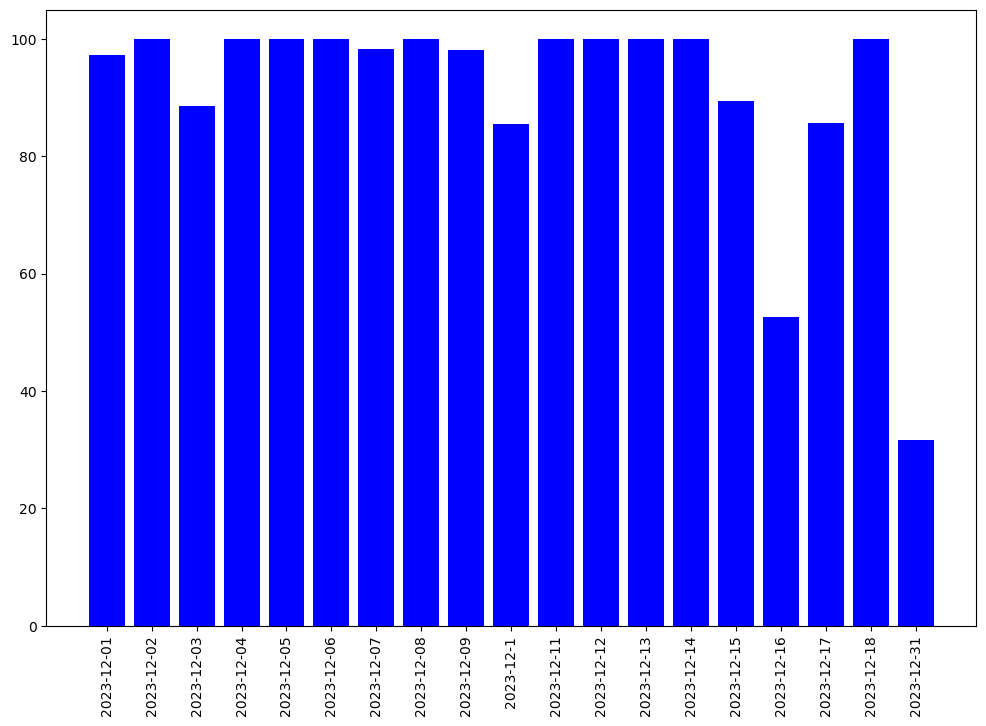

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation = 90)
ax.bar(df_Elizabeth.OCCUPANCY_DATE, df_Elizabeth.OCCUPANCY_RATE_ROOMS,
color = "blue" 
)

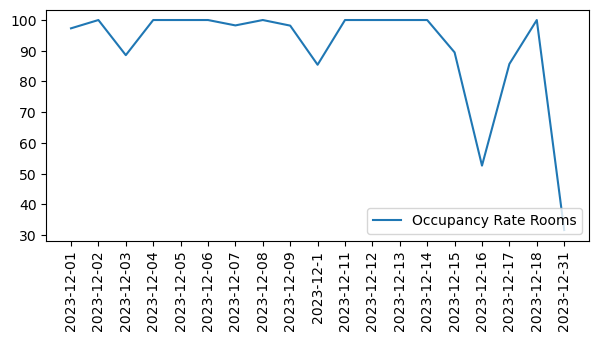

In [23]:
fig, ax = plt.subplots(figsize = (7,3))
plt.xticks(rotation = 90)
ax.plot(df_Elizabeth.OCCUPANCY_DATE,df_Elizabeth.OCCUPANCY_RATE_ROOMS, label="Occupancy Rate Rooms")
ax.legend(loc ="lower right")

Text(0, 0.5, 'Solidity Ratio')

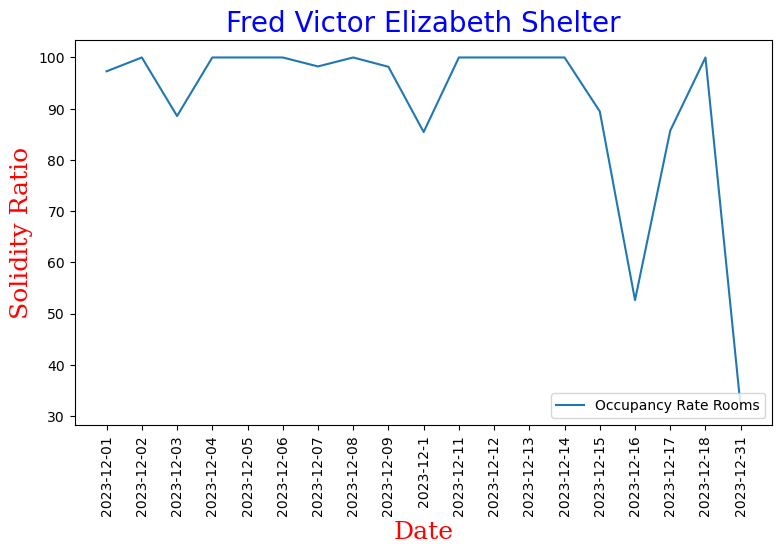

In [28]:
fig, ax = plt.subplots(figsize = (9,5))
plt.xticks(rotation = 90)
ax.plot(df_Elizabeth.OCCUPANCY_DATE,df_Elizabeth.OCCUPANCY_RATE_ROOMS, label="Occupancy Rate Rooms")
ax.legend(loc ="lower right")

font1 = {"family": "sans-serif", "color": "blue", "size":20}
font2 = {"family":"serif", "color":"red"}
ax.set_title("Fred Victor Elizabeth Shelter", fontdict = font1)
plt.xlabel("Date", fontsize = 18, fontdict = font2)
plt.ylabel("Solidity Ratio", fontsize = 18, fontdict = font2)


In [25]:
df_Elizabeth.to_csv("df_Elizabeth.csv")